In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.preprocessing import PolynomialFeatures

In [2]:
traffic_df = pd.read_csv("Metro_Interstate_Traffic_Volume.csv")

In [8]:
def to_farenheit(X): 
    F_x = X - 273.15
    F_x = ((9/5) * (F_x)) + 32.0
    
    return float(F_x)

In [9]:
# Removing 0 Kelvin values
traffic_df = traffic_df[traffic_df['temp'] > 0]
traffic_df["temp"] = traffic_df['temp'].apply(to_farenheit)

In [20]:
#Model : Temp 1st degree
X_train, X_test, Y_train, Y_test = train_test_split(traffic_df['temp'].values, traffic_df['traffic_volume'].values,
                                                    test_size = 0.2, random_state=0)
X_train = X_train.reshape(-1,1)
Y_train = Y_train.reshape(-1,1)
X_test = X_test.reshape(-1,1)
Y_test = Y_test.reshape(-1,1)

model_temp = LinearRegression().fit(X_train, Y_train)

In [21]:
print(model_temp.coef_)
print(model_temp.intercept_)
MSE_temp = metrics.mean_squared_error(Y_test, model_temp.predict(X_test))
print('Mean Squared Error SSE_test:', MSE_temp)

[[11.79464787]]
[2712.56148555]
Mean Squared Error SSE_test: 3862511.3020332707


Model Temp: Traffic Volume = 11.795 * Temp + 2712.561

In [22]:
#Model: Clouds 1st degree
X_train, X_test, Y_train, Y_test = train_test_split(traffic_df['clouds_all'].values, traffic_df['traffic_volume'].values,
                                                    test_size = 0.2, random_state=0)
X_train = X_train.reshape(-1,1)
Y_train = Y_train.reshape(-1,1)
X_test = X_test.reshape(-1,1)
Y_test = Y_test.reshape(-1,1)

model_cloud = LinearRegression().fit(X_train, Y_train)

In [23]:
print(model_cloud.coef_)
print(model_cloud.intercept_)
MSE_cloud = metrics.mean_squared_error(Y_test, model_cloud.predict(X_test))
print('Mean Squared Error SSE_test:', MSE_cloud)

[[3.2656767]]
[3101.3561775]
Mean Squared Error SSE_test: 3894865.8537494475


Model Clouds: Traffic Volume = 3.266 * Clouds + 3101.356

In [24]:
#Model: Temp 2nd degree
X_train, X_test, Y_train, Y_test = train_test_split(traffic_df['temp'].values, traffic_df['traffic_volume'].values,
                                                    test_size = 0.2, random_state=0)
poly = PolynomialFeatures(degree=2, include_bias=False)
X_train = poly.fit_transform(X_train.reshape(-1,1))
Y_train = Y_train.reshape(-1,1)
X_test = poly.transform(X_test.reshape(-1,1))
Y_test = Y_test.reshape(-1,1)

model_temp_2nd = LinearRegression().fit(X_train, Y_train)

In [25]:
print(model_temp_2nd.coef_)
print(model_temp_2nd.intercept_)
MSE_temp_2nd = metrics.mean_squared_error(Y_test, model_temp_2nd.predict(X_test))
print('Mean Squared Error SSE_test:', MSE_temp_2nd)

[[-6.69632832  0.21747521]]
[2988.67869115]
Mean Squared Error SSE_test: 3854065.3435735106


<BarContainer object of 2 artists>

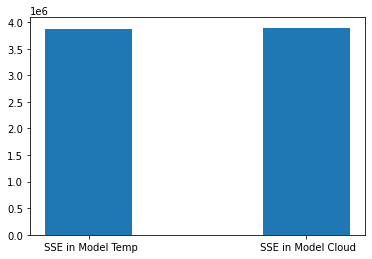

In [26]:
plt.bar((' SSE in Model Temp' , ' SSE in Model Cloud' ), (MSE_temp, MSE_cloud), width = 0.4)